# Reduce Dimensionality of Original Problem
## Hypothesis: there are 40 feature vectors and 1 label vector in the data set. It is likely that fewer feature vectors could be used to reduce noise in training. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.shape

(6991, 41)

In [4]:
y = df["koi_disposition"]
x = df.drop(columns=['koi_disposition'])

In [5]:
x.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
pca_planets = PCA(n_components=2)
principal_components_planets = pca_planets.fit_transform(x)
principal_components_Df = pd.DataFrame(data=principal_components_planets,
                                      columns=['PC_1','PC_2'])

In [8]:
principal_components_Df.to_csv("PCA_features.csv",index=False)

# Two eigenvectors explain ~97% of the variance in the dataset

## Note:
* Standard scaler actually decreases the variance in our vectors, so the top 3 eigenvectors only explain ~25% of the variance in our original dataset. Let's keep the raw data for now

In [9]:
print('Explained variation per principal component: {}'.format(pca_planets.explained_variance_ratio_))

Explained variation per principal component: [0.8479419  0.13228909]


In [10]:
principal_components_Df.head()

,PC_1,PC_2
0,-9851.400324,-23062.027499
1,-9839.990351,-13105.194631
2,-8845.741699,-15853.758004
3,-8707.087705,-23329.791740
4,-9327.154156,-23248.667965


<Figure size 432x288 with 0 Axes>

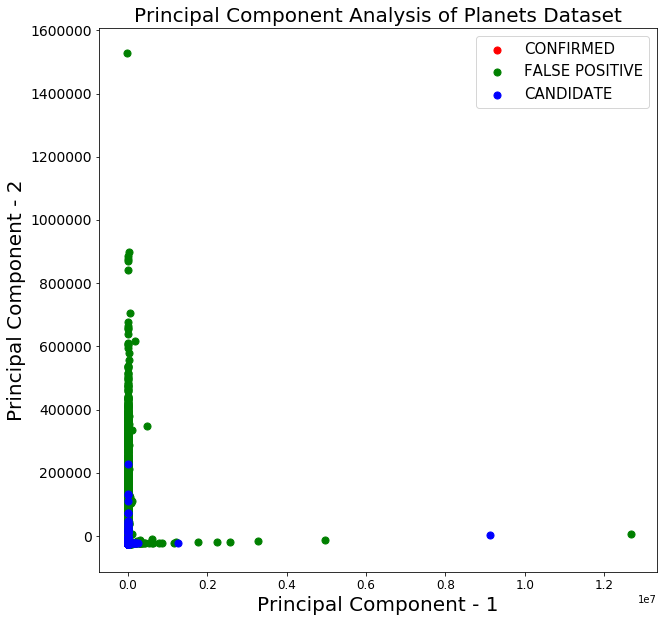

In [12]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Planets Dataset",fontsize=20)

targets = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df['koi_disposition'] == target
    plt.scatter(principal_components_Df.loc[indicesToKeep, 'PC_1']
               , principal_components_Df.loc[indicesToKeep, 'PC_2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})